In [220]:
import tensorflow as tf

In [222]:
from tensorflow.keras import layers,models

In [224]:
from sklearn.preprocessing import StandardScaler

In [226]:
from sklearn.model_selection import train_test_split 

In [228]:
import matplotlib.pyplot as plt


In [230]:
#from sklearn.datasets import fetch_california_housing
boston_dataset = tf.keras.datasets.boston_housing.load_data()
#data = fetch_california_housing()
#X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)
# Standardize the data to improve model performance
#scaler = StandardScaler()
#X_train, X_test = scaler.fit_transform(X_train), scaler.transform(X_test)

'''
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("BostonHousing.csv")  # path to your local file

# Split features and target
X = df.drop(columns=["MEDV"])  # assuming "MEDV" is the target column
y = df["MEDV"]

# Split into train/test
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)
Make sure the column name "MEDV" matches your file — it's the Median value of owner-occupied homes, the usual target in the Boston Housing dataset.
'''

'\nimport pandas as pd\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.preprocessing import StandardScaler\n\n# Load dataset\ndf = pd.read_csv("BostonHousing.csv")  # path to your local file\n\n# Split features and target\nX = df.drop(columns=["MEDV"])  # assuming "MEDV" is the target column\ny = df["MEDV"]\n\n# Split into train/test\nxtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Scale the features\nscaler = StandardScaler()\nxtrain = scaler.fit_transform(xtrain)\nxtest = scaler.transform(xtest)\nMake sure the column name "MEDV" matches your file — it\'s the Median value of owner-occupied homes, the usual target in the Boston Housing dataset.\n'

In [232]:
(xtrain,ytrain),(xtest,ytest)=boston_dataset 

In [234]:
scaler = StandardScaler()
strain, xtest = scaler.fit_transform(xtrain), scaler.transform(xtest)

In [236]:
'''model=models.Sequential([
    Dense(64,activation="relu",input_shape=(xtrain.shape[1],)),
    Dense(1)
])
model.compile(optimizer="adam",loss="mse")
'''
model = Sequential([
    Dense(128, activation='relu', input_shape=(xtrain.shape[1],)), # Increased neurons
    Dropout(0.2), # Dropout to prevent overfitting
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1) # Linear output layer for predicting continuous values
])
model.compile(optimizer="adam",loss="mse")


C:\androidst\anainstalled\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [238]:
history=model.fit(xtrain,ytrain, epochs=100, validation_split=0.2, verbose=0)

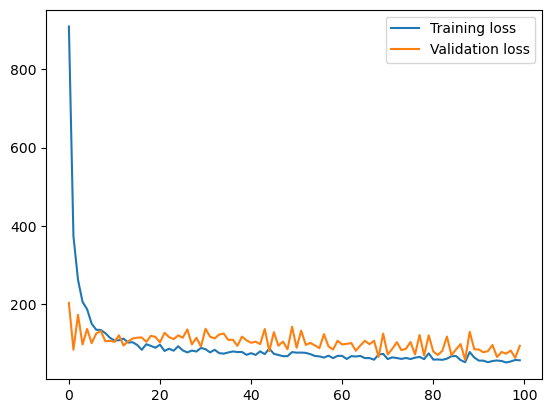

In [239]:
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label="Validation loss")
plt.xlabel=("Epochs")
plt.ylabel=("MSE loss")
plt.legend()
plt.show()

In [240]:
mse=model.evaluate(xtest,ytest, verbose=0)

In [241]:
print("MSE loss",mse)

MSE loss 564.9620971679688


In [242]:
test_mae = model.evaluate(xtest, ytest)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 538.4989 


In [243]:
ypred = model.predict(xtest[:5]).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


In [245]:
print(f"Test MAE: {test_mae}")
print("Actual Prices:", ytest[:5])
print("Predicted Prices:", ypred)

Test MAE: 564.9620971679688
Actual Prices: [ 7.2 18.8 19.  27.  22.2]
Predicted Prices: [0.5002897  0.54215145 0.75889915 1.8942645  1.0334297 ]
